In [ ]:
# HW 1: How do you handle duplicate values in a dataset in Python?

In [3]:
# if in a numpy array
import numpy as np
a = np.array([1,2,3,3,4,5])
print a

a_dedupe = np.unique(a)
print a_dedupe

[1 2 3 3 4 5]
[1 2 3 4 5]


In [4]:
# if a dataframe
import pandas as pd
b = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])
#b = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])


# after checking on documentation, we know that...
b_dedupe = b.drop_duplicates()
print b_dedupe

# what about remove duplicate columns?

   0  1  2  3  4
0  1  2  3  4  5
2  1  2  3  4  6


In [ ]:
# HW 2: friend request

In [16]:
import pandas as pd

friend_request = pd.DataFrame(
    {"requester_id":[1001,1002,1003],
     "time":["2017-07-01","2017-07-02","2017-07-03"],
     "sent_to_id":[3001,3002,3003]}
)

request_accepted = pd.DataFrame(
    {"requester_id":[1001,1003],
     "time":["2017-07-01","2017-07-04"],
     "acceptor_id":[3001,3003]}
)

print(friend_request)
print(request_accepted)

# sql
#select
#sum(if(t2.acceptor_id is null, 0, 1))/sum(1) as acceptance_rate,
#avg(time_diff(t2.time, t1.time)) as time_diff
#from friend_request t1
#left join request_accepted t2
#on t1.requester_id=t2.requeter_id;

   requester_id  sent_to_id        time
0          1001        3001  2017-07-01
1          1002        3002  2017-07-02
2          1003        3003  2017-07-03
   acceptor_id  requester_id        time
0         3001          1001  2017-07-01
1         3003          1003  2017-07-04


In [17]:
a = pd.merge(friend_request,request_accepted,how="left",on="requester_id")
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

0.6666666666666666

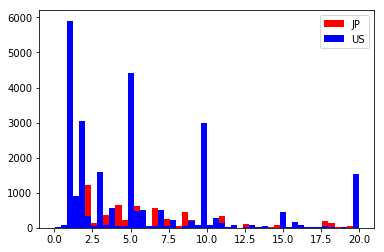

In [6]:
# HW 4: Using our data, draw a histogram which plots both US and JP data on the same plot.
%matplotlib inline
import matplotlib.pyplot as plt

file_location = "/Users/mingchang/Downloads/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

# solution:
fig, ax = plt.subplots()
ax.hist(my_series_jp, bins=50, color = "red", label="JP")
ax.hist(my_series_us, bins=50, color = "blue", label="US")
ax.legend()

In [7]:
# deal with date format
my_data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')
my_data.date.head()
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


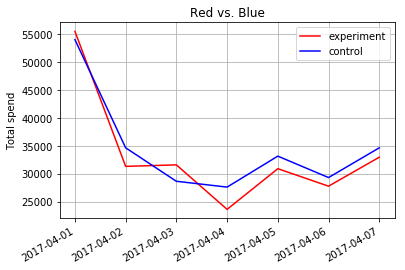

In [8]:
# HW 5: Similarly to PrintDailyTimeSeries() in the sample code, 
# write a Python function called PrintCumulativeTimeSeries().

# function 1: for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

# function 2: for any two series, plot the time series
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

# master function: 
def PrintDailyTimeSeries(my_data, experiment_ids):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    
    PlotSeries(treatment_series, control_series)
    
# test
PrintDailyTimeSeries(my_data, [12624548,12624549])

Cumulative impact: -2.46850453816%


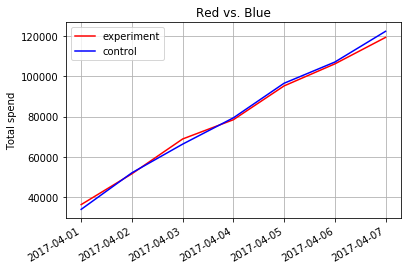

In [9]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum
def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

# alternate solution (pseudo code):
#   for date in our_dates:
#        this_value = series.spend_usd[series.date <= date].sum()
# you will be creating new series, very messy

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)
    
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "JP")

In [10]:
# HW 6: Write a function that can plot 10 (instead of 2) time series in our data.
# key thing is group this part into a function

colors = ["red","blue","green","yellow","purple"]

def GetCumulativeSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

def PlotSeriesV2(series, ax, i):
    this_label = "exp" + str(i)
    ax.plot(series, color = colors[i], label = this_label)
    ax.set_title("As many experiments as we want")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()    
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeriesV2(my_data, experiment_ids):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    fig, ax = plt.subplots()
    for i in range(len(experiment_ids)):
        my_experiment = experiment_ids[i]
        this_series = GetCumulativeSeries(my_data, my_experiment)[0]
        PlotSeriesV2(this_series, ax, i)

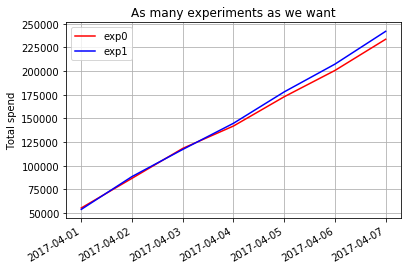

In [11]:
PrintCumulativeTimeSeriesV2(my_data, [12624548,12624549])